In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from wordcloud import WordCloud, STOPWORDS

sns.set_palette('coolwarm_r')
sns.set_style('darkgrid')

In [46]:
df = pd.read_csv("pemilu.csv", sep="delimiter", header=None)
df.head()

<ipython-input-46-646a58e103ba>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("pemilu.csv", sep="delimiter", header=None)


,0
0,id\tconversation_id\tcreated_at\tdate\ttime\tt...
1,1598988753141366785\t1598988753141366785\t2022...
2,1598988533502717952\t1598978908824952833\t2022...
3,1598988458026205186\t1598987652522708992\t2022...
4,1598988138156036096\t1598975159892774912\t2022...


In [47]:
df.loc[0]

0    id\tconversation_id\tcreated_at\tdate\ttime\tt...
Name: 0, dtype: object

In [48]:
df[0].loc[0]

'id\tconversation_id\tcreated_at\tdate\ttime\ttimezone\tuser_id\tusername\tname\tplace\ttweet\tlanguage\tmentions\turls\tphotos\treplies_count\tretweets_count\tlikes_count\thashtags\tcashtags\tlink\tretweet\tquote_url\tvideo\tthumbnail\tnear\tgeo\tsource\tuser_rt_id\tuser_rt\tretweet_id\treply_to\tretweet_date\ttranslate\ttrans_src\ttrans_dest'

In [49]:
cols = df[0].loc[0]
print(cols)

id	conversation_id	created_at	date	time	timezone	user_id	username	name	place	tweet	language	mentions	urls	photos	replies_count	retweets_count	likes_count	hashtags	cashtags	link	retweet	quote_url	video	thumbnail	near	geo	source	user_rt_id	user_rt	retweet_id	reply_to	retweet_date	translate	trans_src	trans_dest


In [50]:
type(cols)

str

In [51]:
cols = re.split('\t', cols)

In [52]:
len(cols)

36

In [53]:
cols[30:]

['retweet_id',
 'reply_to',
 'retweet_date',
 'translate',
 'trans_src',
 'trans_dest']

In [54]:
del cols[32:36]
cols[30:]

['retweet_id', 'reply_to']

In [55]:
len(cols)

32

In [56]:
type(cols)

list

In [57]:
rec = df[0].loc[1:]

In [58]:
type(rec)

pandas.core.series.Series

In [59]:
rec[120]

"1598967485642178561\t1598813736914984960\t2022-12-03 16:08:50 SE Asia Standard Time\t2022-12-03\t16:08:50\t+0700\t793226762851225600\tdzulfaqor1402\tAhmad Dzulfaqor\t\t@irdzi29 @03__nakula yaudah gimana kalo pake narasi ; anies sebaiknya langsung diangkat jadi presiden  3 periode , gak usah ada pemilu  kardus bergembok 25t. jokowi mengaku taun depan smakin berat .  https://t.co/JAo6TfPpuJ\tin\t[]\t[]\t['https://pbs.twimg.com/media/FjCrZYjUYAEPb6x.jpg']\t0\t0\t0\t[]\t[]\thttps://twitter.com/dzulfaqor1402/status/1598967485642178561\tFalse\t\t1\thttps://pbs.twimg.com/media/FjCrZYjUYAEPb6x.jpg\t\t\t\t\t\t\t[{'screen_name': 'irdzi29', 'name': 'Irdzi29', 'id': '1544885851540271104'}, {'screen_name': '03__nakula', 'name': 'Nakula', 'id': '1101696077147729920'}]"

In [60]:
len(re.split('\t',rec[2]))

32

In [61]:
temp = []
for tex in rec:
    tex = re.split('\t', tex)
    temp.append(tex)

In [62]:
type(temp[0])

list

In [63]:
record = pd.Series(temp)

In [64]:
record.head()

0    [1598988753141366785, 1598988753141366785, 202...
1    [1598988533502717952, 1598978908824952833, 202...
2    [1598988458026205186, 1598987652522708992, 202...
3    [1598988138156036096, 1598975159892774912, 202...
4    [1598988120103743490, 1598988120103743490, 202...
dtype: object

In [65]:
len(record[2])

32

In [66]:
#rec1 = pd.Series(record).str.split(pat=None, n=-1, expand=False)
#rec1.head()

In [67]:
#len(rec1.loc[1])

In [68]:
'''temp = []
for x in range(len(record)):
    for y in range(len(cols)):
        print(x)'''

'temp = []\nfor x in range(len(record)):\n    for y in range(len(cols)):\n        print(x)'

In [69]:
dt = pd.DataFrame(record.array, columns=cols)
dt.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to
0,1598988753141366785,1598988753141366785,2022-12-03 17:33:21 SE Asia Standard Time,2022-12-03,17:33:21,+0700,1403066170022891524,jakulunlappung,Jak Ulun Lappung,,...,,0,,,,,,,,[]
1,1598988533502717952,1598978908824952833,2022-12-03 17:32:28 SE Asia Standard Time,2022-12-03,17:32:28,+0700,877657279893458944,pkartawidjaja,PJBlues,,...,,0,,,,,,,,"[{'screen_name': 'MrsRachelIn', 'name': 'indri..."
2,1598988458026205186,1598987652522708992,2022-12-03 17:32:10 SE Asia Standard Time,2022-12-03,17:32:10,+0700,86654218,sanyalkadrie,Sanz,,...,,0,,,,,,,,"[{'screen_name': 'geloraco', 'name': 'GELORA N..."
3,1598988138156036096,1598975159892774912,2022-12-03 17:30:54 SE Asia Standard Time,2022-12-03,17:30:54,+0700,1146046641780039681,_4iii_na_t3h5h,_Aina_Queen,,...,,0,,,,,,,,"[{'screen_name': 'DeeRose782', 'name': 'DeeRos..."
4,1598988120103743490,1598988120103743490,2022-12-03 17:30:50 SE Asia Standard Time,2022-12-03,17:30:50,+0700,1484217126395482112,tommyesa78,➡️,,...,https://twitter.com/puspita3_eka/status/159898...,0,,,,,,,,[]


In [70]:
print(dt.loc[1])

id                                               1598988533502717952
conversation_id                                  1598978908824952833
created_at                 2022-12-03 17:32:28 SE Asia Standard Time
date                                                      2022-12-03
time                                                        17:32:28
timezone                                                       +0700
user_id                                           877657279893458944
username                                               pkartawidjaja
name                                                         PJBlues
place                                                               
tweet              @MrsRachelIn @NasDem @Metro_TV @mohmahfudmd @K...
language                                                          in
mentions                                                          []
urls                                                              []
photos                            

In [71]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1010 non-null   object
 1   conversation_id  1009 non-null   object
 2   created_at       1009 non-null   object
 3   date             1009 non-null   object
 4   time             1009 non-null   object
 5   timezone         1009 non-null   object
 6   user_id          1009 non-null   object
 7   username         1009 non-null   object
 8   name             1009 non-null   object
 9   place            1009 non-null   object
 10  tweet            1009 non-null   object
 11  language         1008 non-null   object
 12  mentions         1008 non-null   object
 13  urls             1008 non-null   object
 14  photos           1008 non-null   object
 15  replies_count    1008 non-null   object
 16  retweets_count   1008 non-null   object
 17  likes_count      1008 non-null   

In [72]:
dt['tweet'].drop_duplicates(inplace=True)
dt.dropna(inplace=True)
dt = dt.reset_index(drop=True)

In [73]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1007 non-null   object
 1   conversation_id  1007 non-null   object
 2   created_at       1007 non-null   object
 3   date             1007 non-null   object
 4   time             1007 non-null   object
 5   timezone         1007 non-null   object
 6   user_id          1007 non-null   object
 7   username         1007 non-null   object
 8   name             1007 non-null   object
 9   place            1007 non-null   object
 10  tweet            1007 non-null   object
 11  language         1007 non-null   object
 12  mentions         1007 non-null   object
 13  urls             1007 non-null   object
 14  photos           1007 non-null   object
 15  replies_count    1007 non-null   object
 16  retweets_count   1007 non-null   object
 17  likes_count      1007 non-null   

In [74]:
dt.describe()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to
count,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,...,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007
unique,1007,826,993,2,993,1,789,789,787,2,...,48,2,310,1,1,1,1,1,1,207
top,1598860550510895104,1598855291856375808,2022-12-03 12:30:00 SE Asia Standard Time,2022-12-03,12:30:00,+0700,1564288747557888000,pemiludamai2024,PemiluDamai2024🇮🇩,,...,,0,,,,,,,,[]
freq,1,12,4,911,4,1007,16,16,16,1006,...,955,692,692,1007,1007,1007,1007,1007,1007,632


In [75]:
dt.iloc[71]

id                                               1598975832579624960
conversation_id                                  1598975832579624960
created_at                 2022-12-03 16:42:00 SE Asia Standard Time
date                                                      2022-12-03
time                                                        16:42:00
timezone                                                       +0700
user_id                                          1593861451797889025
username                                              panwascamtansa
name                                 Panwaslu Kecamatan Tanah Sareal
place              {'type': 'Point', 'coordinates': [-6.18903118,...
tweet              Difabel Memiliki Hak Yang Sama Dalam Pemilu da...
language                                                          in
mentions                                                          []
urls               ['https://www.instagram.com/p/Cls34flhhgr/?igs...
photos                            

In [76]:
dt['tweet'][dt['place'] != dt['place'].loc[1]]

71    Difabel Memiliki Hak Yang Sama Dalam Pemilu da...
Name: tweet, dtype: object

In [77]:
dt['likes_count'].value_counts()

0      684
1      158
2       64
4       22
3       21
6        7
5        6
12       5
7        5
18       5
9        3
13       2
11       2
8        2
10       2
15       2
17       2
62       1
35       1
33       1
92       1
23       1
207      1
26       1
43       1
16       1
45       1
46       1
25       1
138      1
40       1
36       1
Name: likes_count, dtype: int64

In [78]:
dt['tweet'].iloc[[1003,1004]].array

<PandasArray>
['"KPU meluncurkan maskot Pemilu 2024 bernama ""Sura dan Sulu"" serta jingle berjudul ""Memilih untuk Indonesia"". Maskot bersimbol surat suara dan alat coblos tersebut merupakan sepasang burung Jalak Bali. #Polhuk #AdadiKompas  https://t.co/621z0TBag0"', '"KPU meluncurkan maskot Pemilu 2024 bernama ""Sura dan Sulu"" serta jingle berjudul ""Memilih untuk Indonesia"". Maskot bersimbol surat suara dan alat coblos tersebut merupakan sepasang burung Jalak Bali. #Polhuk #AdadiKompas   https://t.co/jmzBkb6Wyd"']
Length: 2, dtype: object

In [79]:
dt.iloc[:,[7,3,10,20]]

,username,date,tweet,link
0,jakulunlappung,2022-12-03,Garut Sisca Innalillahi Pangandaran Kebumen Ba...,https://twitter.com/jakulunlappung/status/1598...
1,pkartawidjaja,2022-12-03,@MrsRachelIn @NasDem @Metro_TV @mohmahfudmd @K...,https://twitter.com/PKartawidjaja/status/15989...
2,sanyalkadrie,2022-12-03,@geloraco Contoh jelasnya PJ Gub DKI.. serasa ...,https://twitter.com/sanyalkadrie/status/159898...
3,_4iii_na_t3h5h,2022-12-03,@DeeRose782 Begini nih kalau ODGJ diijinkan ik...,https://twitter.com/_4iii_Na_T3H5h/status/1598...
4,tommyesa78,2022-12-03,Se arogan ini kah mereka? Begitu bernafsunya m...,https://twitter.com/Tommyesa78/status/15989881...
...,...,...,...,...
1002,tvonenews,2022-12-02,KPU Patuhi Arahan Jokowi Soal Pencegahan Polit...,https://twitter.com/tvOneNews/status/159869412...
1003,kompasdata,2022-12-02,"""KPU meluncurkan maskot Pemilu 2024 bernama """"...",https://twitter.com/KompasData/status/15986937...
1004,hariankompas,2022-12-02,"""KPU meluncurkan maskot Pemilu 2024 bernama """"...",https://twitter.com/hariankompas/status/159869...
1005,rakyatj97874842,2022-12-02,@OposisiCerdas Klo gak mudah yo gampang pak dh...,https://twitter.com/RAKYATJ97874842/status/159...


In [80]:
dt_use = dt.iloc[:,[7,3,10,20]]

In [81]:
dt_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  1007 non-null   object
 1   date      1007 non-null   object
 2   tweet     1007 non-null   object
 3   link      1007 non-null   object
dtypes: object(4)
memory usage: 31.6+ KB


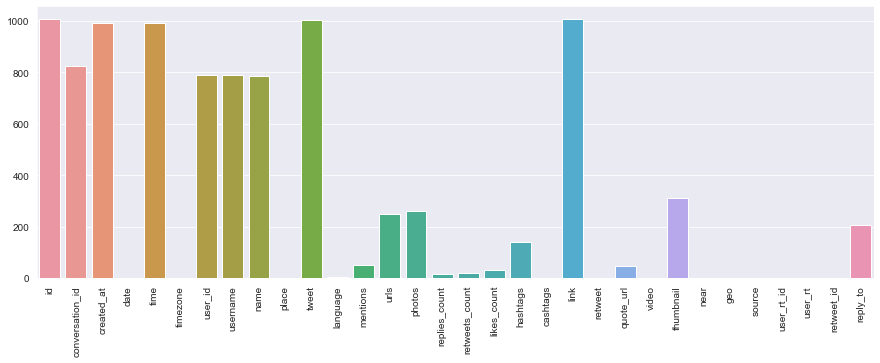

In [82]:
f, ax =plt.subplots(1,1, figsize=(15,5))
sns.barplot(x=dt.describe().columns, y=dt.describe().values[1])
plt.xticks(rotation=90)
plt.show()

In [83]:
usercount = pd.DataFrame(dt['username'].value_counts())
usercount.head(1)

,username
pemiludamai2024,16


In [84]:
usercount[usercount['username'] >4].index

Index(['pemiludamai2024', 'kpukampar', 'beritasatu', 'sulaem7sulaeman',
       'panwaslongmes'],
      dtype='object')

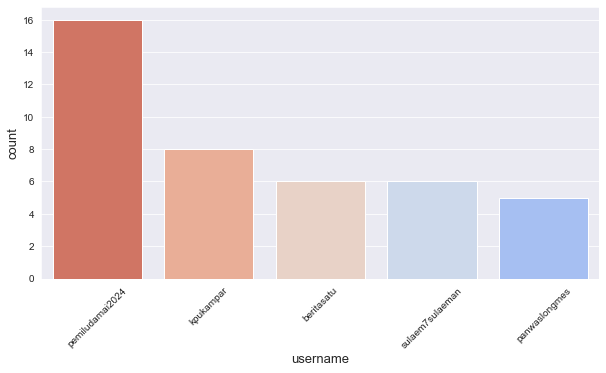

In [85]:
fig = plt.subplots(figsize=(10,5))
sns.barplot(x=usercount[usercount['username'] >4].index, y=usercount['username'][usercount['username'] >4])
plt.xlabel('username', fontsize=13)
plt.ylabel('count', fontsize=13)
plt.xticks(rotation=45)
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


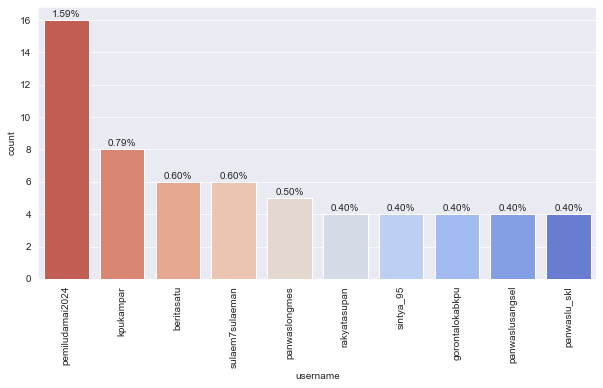

In [86]:
tot = float(len(dt['username']))
f, ax = plt.subplots(1,1, figsize=(10,5))
sns.countplot(dt['username'], order=dt['username'].value_counts().index[:10], palette='coolwarm_r')
for x in ax.patches:
    height = x.get_height()
    ax.text(x.get_x()+x.get_width()/2., 
    height + 0.2, 
    '{:1.2f}%'.format(100*height/tot),
    ha='center')
plt.xticks(rotation=90)
plt.show()

In [87]:
dt_use.describe().values[1]

array([789, 2, 1005, 1007], dtype=object)

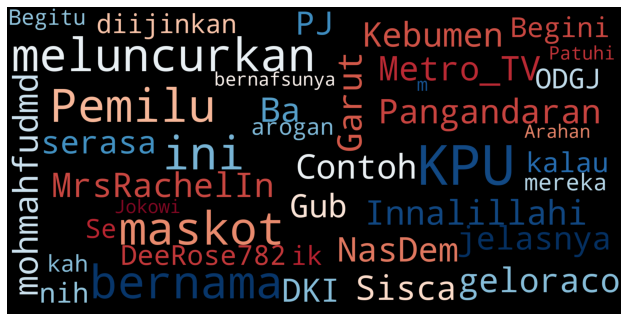

In [88]:
stpwords = set(STOPWORDS)
wrdcloud = WordCloud(
    stopwords=stpwords,
    max_words=40,
    max_font_size=36,
    scale=5,
    random_state=100,
    colormap='RdBu'
).generate(str(dt_use['tweet']))
fig = plt.subplots(1,figsize=(11,11))
plt.axis('off')
plt.imshow(wrdcloud)
plt.show()

In [90]:
dt_use.to_csv('twet_data.csv', index=False)

### More Slang words

In [ ]:
rawslang = open("Raw_data\slangword.txt","r")
slangsplit = rawslang.read()
slangsplit = re.split('\n|\t', slangsplit)

In [ ]:
def Conv_listtodict(list):
    res = {list[i]: list[i + 1] for i in range(0, len(list), 2)}
    return res

In [ ]:
slang_dict = Conv_listtodict(slangsplit[:2710])

In [ ]:
with open('CleanerText\clean_slangwords2.txt','w') as data:
    data.write(str(slang_dict))